# Homework 3
### Optimization via Stochastic Gradient Descent.
Here goes the text of the problem.

The following has been written by me during classes.

In [28]:
from utility import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plot_error(errs, figsize=(10,3)):
    """
    This function enables you to simply plot the error
    of the gradient descent with respect to the epoch e
    """ 
    plt.figure(figsize=figsize)
    
    plt.subplot(1,2,1)
    plt.plot(range(errs[0].shape[-1]), errs[0], 'r-')
    plt.xlabel('n-th epoch')
    plt.title('SGD Gradient error')
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(range(errs[1].shape[-1]), errs[1], 'r-')
    plt.xlabel('k-th iteration')
    plt.title('GD Gradient error')
    plt.grid()
    
def plot_errors(x, k, err_grad, err_sol, text, ):
    
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    plt.plot(np.arange(1,k+2,1), err_grad, 'r-')
    plt.xlabel('k-th iteration')
    plt.title('Gradient error')
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(np.arange(1,k+2,1), err_sol, 'r-')
    plt.xlabel('k-th iteration')
    plt.title('Solution Error')
    plt.grid()
    
    plt.show()

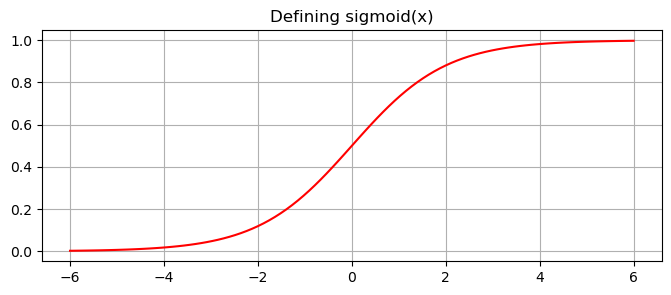

In [30]:
# Define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

a = np.linspace(-6,6,100)
plt.figure(figsize=(8,3))
plt.plot(a, sigmoid(a),'r-')
plt.grid()
plt.title("Defining sigmoid(x)")
plt.show()

In [31]:
def f(w, xhat):
    return sigmoid(xhat.T@w)

def grad_f(w, xhat):
    return f(w, xhat)*(1-f(w, xhat))

In [32]:
def loss(w, X, Y):
    d,N = X.shape
#     return np.mean(np.square(f(w,X) - Y))/(2*N)
#     return np.mean(np.linalg.norm(f(w,X) - Y)**2)/(2*N)
    return (1/2*N)*np.linalg.norm(f(w,X) - Y)**2

def grad_loss(w, X, Y):
    d,N = X.shape
#     return (X@(f(w,X)*(1-f(w,X))*(f(w,X)-Y)))/N
    return (X@(grad_f(w,X)*(f(w,X)-Y)))/N

In [33]:
def get_Xhat(X, N):
    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
    return Xhat

In [34]:
def normalize(y,C1,C2):
    y_normalized = y.copy()
#     y_normalized[y_normalized==C1] = 0
#     y_normalized[y_normalized==C2] = 1
#     return y_normalized

    for i in range(y.shape[1]):
        if y_normalized[0][i] == C1:
            y_normalized[0][i] = 0
        elif y_normalized[0][i] == C2:
            y_normalized[0][i] = 1
        else:
             raise Exception("There was a problem with the prediction. None of the given classes corresponded to the predicted label ")
    return y_normalized

def denormalize(y,C1,C2):
    y_denormalized = y.copy()
#     y_normalized[y_normalized==C1] = 0
#     y_normalized[y_normalized==C2] = 1
#     return y_normalized

    for i in range(y.shape[1]):
        if y_denormalized[0][i] == 0:
            y_denormalized[0][i] = C1
        elif y_denormalized[0][i] == 1:
            y_denormalized[0][i] = C2
        else:
             raise Exception("There was a problem with the prediction. None of the given classes corresponded to the predicted label ")
    return y_denormalized

In [35]:
def predict(w, X, y, threshold=0.5):
    y_pred = f(w, X)
    y_pred[y_pred>threshold] = 1
    y_pred[y_pred<=threshold] = 0
    correct = np.sum(y_pred == y)
    accuracy = correct/y.shape[-1]
    return accuracy

def classify(w, x_hat, threshold=0.5):
    label = f(w, x_hat)
    if label >= threshold:
        return C2
    else:
        return C1

In [36]:
def backtracking(f, grad_f, x, multivariate, D):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    multivariate: boolean. Indicate whether the function f
    is multivariate or not.
    """
    X, y = D
    y = y[0,:] # this is necessary to avoid problems with the shape during grad_loss computation
    if multivariate:
        norm = np.linalg.norm
    else:
        norm = np.abs

    alpha = 1
    c = 0.8
    tau = 0.25

    while f((x - alpha * grad_f(x, X, y)), X, y) > f(x, X, y) - c * alpha * norm(grad_f(x, X, y)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha


def GD(loss, grad_loss, w0, D, kmax, tolf, tolx, back_tracking=False, alpha=1, multivariate=True):
    """
    This function implements the Gradient Descent algorithm.
    """
    if multivariate:
        norm = np.linalg.norm
    else:
        norm = np.abs
    X,y = D
    y = y[0,:] # this is necessary to avoid problems with the shape during grad_loss computation
    # Initialize x_k
    w_k = w0

    # counter
    k = 0

    # Initialize the outputs
    w = [w0]
    f_val = [loss(w0,X,y)]
    grads = [grad_loss(w0,X,y)]
    err = [norm(grads[-1])]

    # Loop
    condition = True
    while condition:
        # Update alpha
        if back_tracking:
            alpha = backtracking(loss, grad_loss, w_k, multivariate, D)
        # Update x
        w_k = w_k - alpha * grad_loss(w_k,X,y)

        # Update outputs
        w.append(w_k)
        f_val.append(loss(w_k,X,y))
        grads.append(grad_loss(w_k,X,y))
        err.append(norm(grads[-1]))

        # check criteria
        condition1 = norm(grad_loss(w_k,X,y)) > (tolf * norm(grad_loss(w0,X,y)))
        condition2 = norm(w_k) > tolx
        condition3 = k < kmax
        condition = condition1 and condition2 and condition3

        # update k
        k += 1

    return w_k, k, np.array(w), np.array(f_val), np.array(grads), np.array(err)

## Stochastic Gradient Descent
You sample a batch of data, e.g. batch_size = 10 and you compute the values for batch_size instead of N.  
Then you start again with another batch until you've finished your data. This is an **epoch**.

In [37]:
# TASK (HARD)
# Implement a function: 
# SGD(loss, grad_loss, f, grad_f, D, batch_size, n_epochs) (you can also define f and grad_f globally)
# that implements the Stochastic Gradient Descent algorithm with
# given batch_size for the given number of epochs.
# alpha <-> learning_rate FIXED at 1e-3 (it doesn't have stopping conditions)

# Note: as what i've understood the learning rate cannot be automatically recomputed, 
# it has to be set by hand

# f and grad_f could be defined globally
def SGD(loss, grad_loss, w0, D, batch_size, n_epochs, learning_rate=1e-3):
    # Initialize the parameters w
    w = w0
        
    # Extract X and y from D
    X, y = D
    
    # Save in memory the length of X (and y)    
    d,N = X.shape
    
    # Compute the number of batches per epoch
    
    n_batch_per_epoch = N // batch_size # integer division in case batch_size doesn't divide N
    
     # Initialize the output
    
    # a vector containing the value of l(w_k; D) after each epoch
    loss_history = np.zeros((n_epochs,))
    # a vector (w) containing the value of w_k for each iterate
    w_history = np.zeros((n_epochs, d))
    # a vector containing the value of grad_l(w_k; D) after each epoch
    grad_loss_history = np.zeros((n_epochs,d))
    # a vector containing the value of ||grad_l(w_k; D)||_2 after each epoch
    err = np.zeros((n_epochs,))
    
    # Iterate over the epochs
    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)
        
        # Batch iteration
        for k in range(n_batch_per_epoch):
            X_batch = X[:, idx[k * batch_size : (k+1) * batch_size]]
            y_batch = y[0, idx[k * batch_size : (k+1) * batch_size]]
            
            B = (X_batch, y_batch) # it should not be necessary to define B.
            
            # Gradient descent update
            # The gradient has to be computed in B, 
            # it cannot be computed on the entire dataset as it will crash!!
            gradient = grad_loss(w, X_batch, y_batch)
            w = w - learning_rate * gradient
            
        w_history[epoch] = w 
        loss_history[epoch] = loss(w, X_batch, y_batch)  
        grad_loss_history[epoch] = gradient
        err[epoch] = np.linalg.norm(gradient)
        
        
    return w, w_history, loss_history, grad_loss_history, err

In [38]:
df = pd.read_csv('dataset/mnist-data.csv')
display(df.head())
data_array= df.to_numpy()
data_array = data_array.T
X_mid, y_mid = data_array[1:,:], data_array[:1, :]
X_mid.shape, y_mid.shape

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


((784, 42000), (1, 42000))

To test the script above, consider the MNIST dataset we used in the previous laboratories, and do the
following:
1. From the dataset, select only two digits. It would be great to let the user input the two digits to
select.
2. Do the same operation of the previous homework to obtain the training and test set from (X, Y ),
selecting the Ntrain you prefer.
3. Consider Lecture 11 on my website about the implementation of Logistic Regression for binary
classification https://www.evangelistadavide.com/teaching/logistic_regression2024/. It
has not been described in class, but it is equivalent to Linear Regression with a slightly modified
model. After carefully reading the post, implement a logistic regression classificator.

In [39]:
print("Select two classes of digits you wanna use! ")

C1 = int(input("First one: "))
while C1 not in [d for d in range(0,10)]:
    C1 = int(input("First one, but right! : "))
    
C2 = int(input("Second one: "))
while C2 not in [d for d in range(0,10)] or C2 == C1:
    C2 = int(input("Cmon, Second one! : "))

idx = (y_mid[0] == C1) | (y_mid[0] == C2)
X = X_mid[:, idx]
y = y_mid[:, idx]

Select two classes of digits you wanna use! 
First one: 3
Second one: 4


Extracting random data points of classes 3,4 from the dataset:
Class 3:  4351
Class 4:  4072


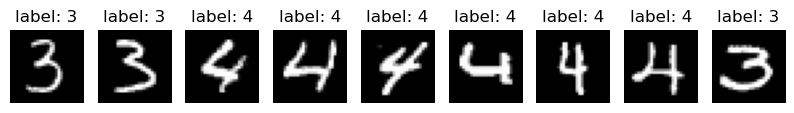

In [40]:
# Verifying the correctness of the chosen classes
i = np.random.choice(X.shape[1], size=9, replace=False)
fig, axes = plt.subplots(1,9, figsize=(10,10))
print(f"Extracting random data points of classes {C1},{C2} from the dataset:")

for j, index in enumerate(i):
    image = X[:, index].reshape(28,28)
    axes[j].imshow(image, cmap="gray")
    axes[j].set_title(f"label: {y[0, index]}")
    axes[j].axis("off")
    
print(f"Class {C1}: ", np.sum(y[0]==C1))
print(f"Class {C2}: ", np.sum(y[0]==C2))

### Defining the train and test set
train size = 80%

In [41]:
train_proportion = 0.8
N_train = int(train_proportion * y.shape[1])
X_train, y_train, X_test, y_test = train_test_split(X, normalize(y,C1,C2), N_train)

# Create Xhat
d,N = X_train.shape
Xhat_train = get_Xhat(X_train, N)

### Computing SGD
n_epochs = 10  
learning_rate = 0.001

In [64]:
D_train = (Xhat_train, y_train)
n_epochs = 10
batch_size = 100
learning_rate=1e-3
w0 = np.zeros((Xhat_train.shape[0]))

# Computing SGD
w, w_history, loss_history, grad_loss_history, err = SGD(loss, grad_loss, w0, D_train, batch_size, n_epochs, learning_rate)

Predicting random data points of classes 3,4 from the test set:
Accuracy on the test set: 99.35%


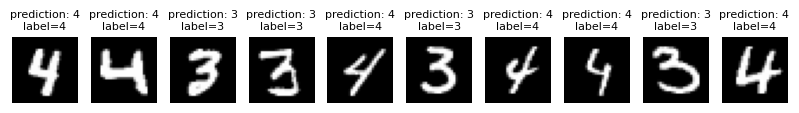

In [65]:
d,N = X_test.shape
Xhat_test = get_Xhat(X_test, N)

size = 10
i = np.random.choice(Xhat_test.shape[1], size=size, replace=False)
fig, axes = plt.subplots(1,size, figsize=(10,10))

print(f"Predicting random data points of classes {C1},{C2} from the test set:")

for j, index in enumerate(i):
    image = Xhat_test[1:, index].reshape(28,28)
    axes[j].imshow(image, cmap="gray")
    axes[j].set_title(f"prediction: {classify(w, Xhat_test[:,index])}\nlabel={denormalize(y_test,C1,C2)[0, index]}", fontsize=8)
    axes[j].axis("off")
    
print(f"Accuracy on the test set (SGD): {round(predict(w, Xhat_test, y_test, 0.5)*100,2)}%")

In [75]:
# Computing GD
kmax = 10
tolf = tolx = 1e-5
w_k, k, ws, f_vals, grads, errs = GD(loss, grad_loss, w0, D_train, kmax, tolf, tolx, alpha=1e-3, multivariate=True)

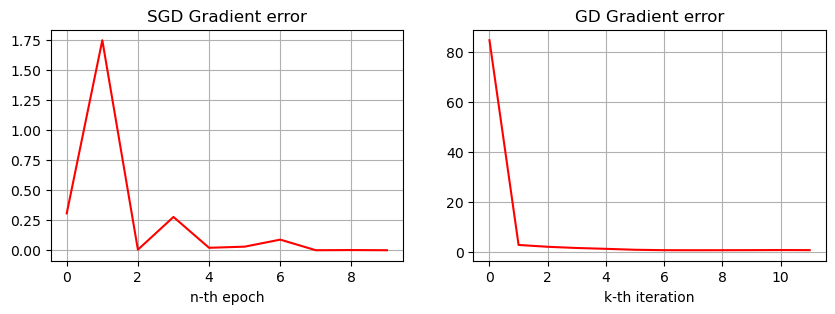

In [76]:
errors = [err,errs]
plot_error(errors)

In [77]:
d,N = X_test.shape
Xhat_test = get_Xhat(X_test, N)
accuracy_GD = predict(w_k, Xhat_test, y_test, 0.5)

print(f"Accuracy of the polynomial classficator for digits {C1, C2}: {round(accuracy_GD*100,2)}%")

Accuracy of the polynomial classficator for digits (3, 4): 98.22%


### Let's try a different scenario:
digits from classes 0 and 5

Predicting random data points of classes 0,5 from the test set:
Accuracy on the test set (SGD): 98.17%
Accuracy on the test set (GD): 93.57%


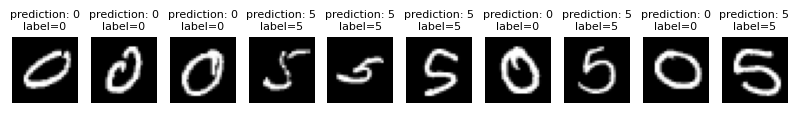

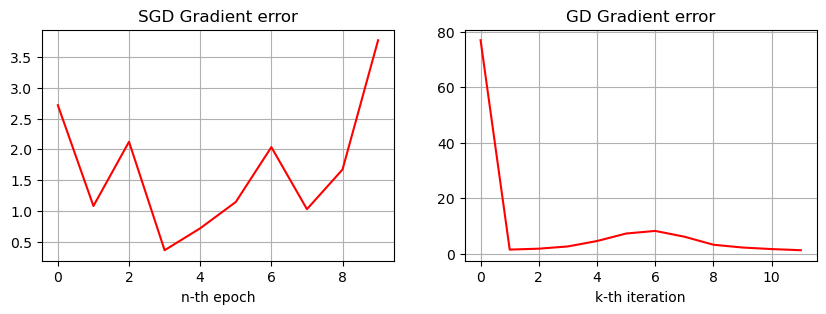

In [89]:
C1 = 0
C2 = 5

idx = (y_mid[0] == C1) | (y_mid[0] == C2)
X = X_mid[:, idx]
y = y_mid[:, idx]

train_proportion = 0.8
N_train = int(train_proportion * y.shape[1])
X_train, y_train, X_test, y_test = train_test_split(X, normalize(y,C1,C2), N_train)

# Create Xhat
d,N = X_train.shape
Xhat_train = get_Xhat(X_train, N)

D_train = (Xhat_train, y_train)
n_epochs = 10
batch_size = 100
learning_rate=1e-3
w0 = np.zeros((Xhat_train.shape[0]))

# Computing SGD
w, w_history, loss_history, grad_loss_history, err = SGD(loss, grad_loss, w0, D_train, batch_size, n_epochs, learning_rate)

d,N = X_test.shape
Xhat_test = get_Xhat(X_test, N)

size = 10
i = np.random.choice(Xhat_test.shape[1], size=size, replace=False)
fig, axes = plt.subplots(1,size, figsize=(10,10))
print(f"Predicting random data points of classes {C1},{C2} from the test set:")

for j, index in enumerate(i):
    image = Xhat_test[1:, index].reshape(28,28)
    axes[j].imshow(image, cmap="gray")
    axes[j].set_title(f"prediction: {classify(w, Xhat_test[:,index])}\nlabel={denormalize(y_test,C1,C2)[0, index]}", fontsize=8)
    axes[j].axis("off")
    
print(f"Accuracy on the test set (SGD): {round(predict(w, Xhat_test, y_test, 0.5)*100,2)}%")

# Computing GD
kmax = 10
tolf = tolx = 1e-5
w_k, k, ws, f_vals, grads, errs = GD(loss, grad_loss, w0, D_train, kmax, tolf, tolx, alpha=1e-3, multivariate=True)

errors = [err,errs]
plot_error(errors)

d,N = X_test.shape
Xhat_test = get_Xhat(X_test, N)
accuracy_GD = predict(w_k, Xhat_test, y_test, 0.5)

print(f"Accuracy on the test set (GD): {round(accuracy_GD*100,2)}%")

this classification algorithm doesn't suffer from overfitting as the one before! overall, SGD behaves better than GD